In [1]:
#PREPRARING AND IMPORTING LIBARAIES

import numpy as np

import sympy as sp

import scipy

import matplotlib.pyplot as plt

import math

import pandas as pd

from pandas import Series

from statsmodels.tsa.tsatools import lagmat

from sklearn.metrics.pairwise import euclidean_distances as dist

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

import sklearn

from sklearn.preprocessing import MinMaxScaler

import keras

from keras.models import Sequential

from keras.layers import LSTM , Dense ,SimpleRNN

from keras.activations import relu ,tanh , sigmoid

from keras.regularizers import l2

Using TensorFlow backend.


In [2]:
#IMPORTING A DATAFRAME FROM EXCEL FILE

df  = pd.read_csv(r'C:\Users\ASUS\Desktop\EURUSD60.csv')
df

,Unnamed: 0,Unnamed: 1,open,high,low,close,volume
0,2018.08.16,10:00,1.13740,1.13778,1.13561,1.13666,8940
1,2018.08.16,11:00,1.13666,1.13883,1.13647,1.13813,7330
2,2018.08.16,12:00,1.13810,1.13815,1.13639,1.13701,6072
3,2018.08.16,13:00,1.13703,1.13741,1.13618,1.13628,4817
4,2018.08.16,14:00,1.13627,1.13778,1.13593,1.13673,6085
...,...,...,...,...,...,...,...
16282,2021.04.02,19:00,1.17598,1.17613,1.17564,1.17589,2760
16283,2021.04.02,20:00,1.17592,1.17616,1.17587,1.17614,1324
16284,2021.04.02,21:00,1.17614,1.17638,1.17598,1.17612,1473
16285,2021.04.02,22:00,1.17612,1.17637,1.17593,1.17598,847


In [3]:
#CHOOSE CLOSE PRICE COLUMNS

df = df ['close'][-5000:,]
df 

11287    1.13022
11288    1.13090
11289    1.13048
11290    1.13010
11291    1.12458
          ...   
16282    1.17589
16283    1.17614
16284    1.17612
16285    1.17598
16286    1.17597
Name: close, Length: 5000, dtype: float64

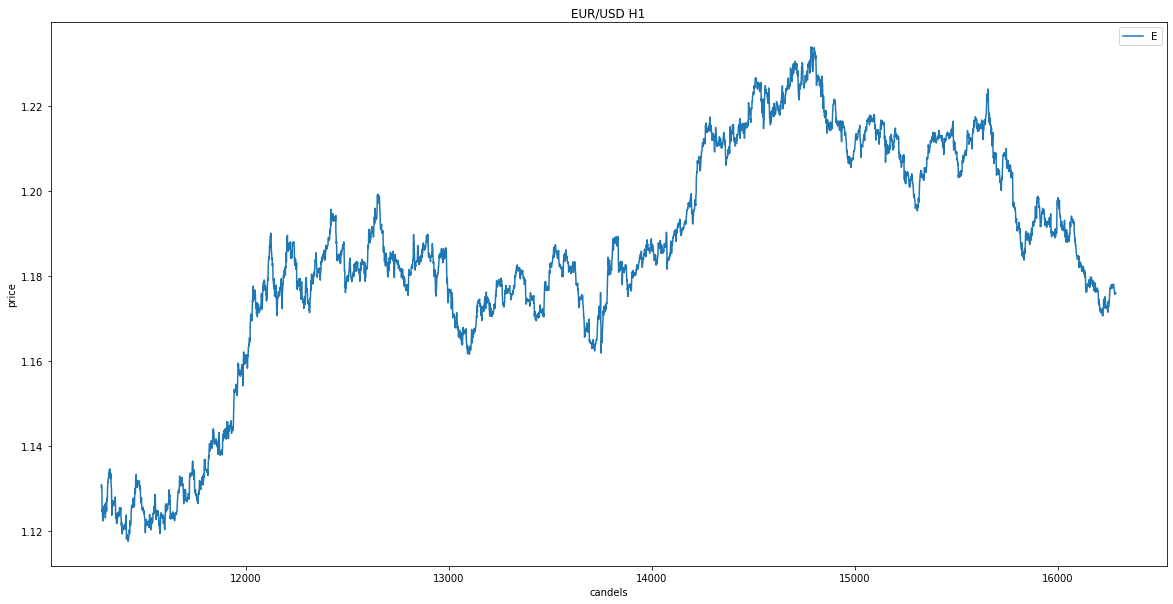

In [4]:
#PLOTING CLOSE PRICE

plt.figure(figsize=(20,10))
plt.plot(df)
plt.title('EUR/USD H1')
plt.xlabel('candels')
plt.ylabel('price')
plt.legend('EURUSD PRICE')

In [5]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [6]:
stationary_data = difference(list(df))

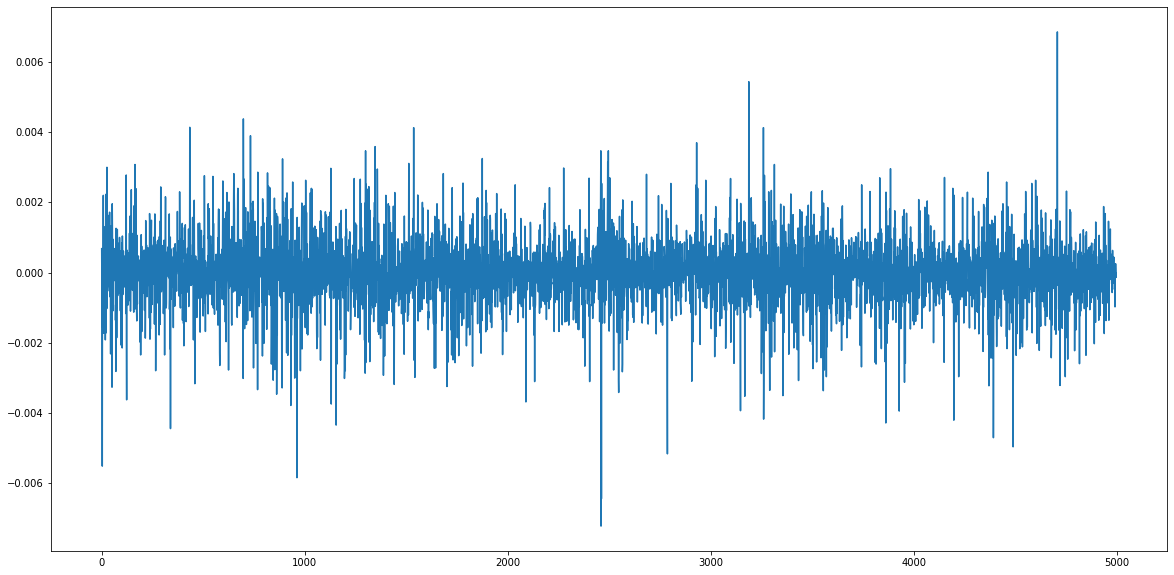

In [7]:
#PLOT DETREND VALUES OF TIME SERIES

plt.figure(figsize=(20,10))
plt.plot(stationary_data[:])

In [8]:
#DEFINE A MUTUAL INFORMATION FUNCTION (FOR LAGMENT WITH MOST CORROLATION)


def mutual_information(X,Y,bins):
    # See this page on wikipedia: https://en.wikipedia.org/wiki/Mutual_information
    c_XY = np.histogram2d(X,Y,bins)[0]
    c_X = np.histogram(X,bins)[0]
    c_Y = np.histogram(Y,bins)[0]

    H_X = shan_entropy(c_X)
    H_Y = shan_entropy(c_Y)
    H_XY = shan_entropy(c_XY)

    MI = H_X + H_Y - H_XY
    return MI

def shan_entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

In [9]:
df = np.array (df)
data_close = df
data_close

array([1.13022, 1.1309 , 1.13048, ..., 1.17612, 1.17598, 1.17597])

In [10]:
max_tao=500

In [11]:
#CREATE TAO LAG IN RANGE (0,MAX_TAO)

data_tao_close = []

for tao in range (0,max_tao):
    data_tao_close.append(df[tao:len(df)])
data_tao_close = np.array(data_tao_close)
data_tao_close = np.reshape(data_tao_close,(data_tao_close.shape[0],))

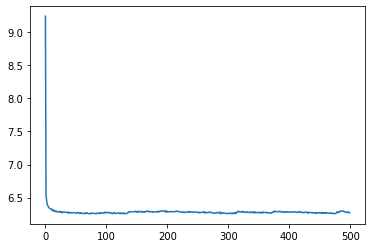

In [12]:
#MUTUAL INFORMATION FOR TIMESERIES AND LAGMENT TIME SERIES

m_i_t_close=[]

for i in range (0,data_tao_close.shape[0]):
    m_i_t_close.append(mutual_information(df[0:data_tao_close[i,].shape[0]],data_tao_close[i],1000))
plt.figure()
plt.plot(m_i_t_close)

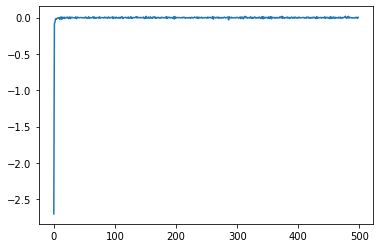

In [13]:
##SUBTRACT VALUE OF MUTUAL INFORMATION OF T(I) AND T(I-1) TO FIND FIRST LOCAL MINIMUM
m_i_t_tao_close=[]
i=1
while i <= max_tao-1:
    m_i_t_tao_close.append(m_i_t_close[i]-m_i_t_close[i-1])
    i=i+1

plt.plot(m_i_t_tao_close)

In [14]:
#PRINT THE VALUES OF TIME SERIES LAGMENT THAT ARE IN LOCAL MINIMUM

for i in range (0,max_tao-1):
    if m_i_t_tao_close[i]>0:
        print(m_i_t_tao_close[i])

0.0006165783971425753
0.010488649823916063
0.004101135973259673
0.002852576457986089
0.007392858448058703
0.0024655138136040478
5.5584315484580316e-05
0.008850243416555159
0.004446003392148512
0.00864320727615464
0.0059562757478826
0.004967444802526089
0.011690868214795813
0.006175305813309606
0.004085830993558304
0.001132146395168121
0.0014327332576637986
0.002480975401486063
0.0010723614343230992
0.003397742706669149
0.008534585740941125
0.00093900954345294
0.0018730267195437023
0.012457920365406494
0.001143068392501334
0.0023321925470796145
0.008972560992324574
0.010001998703335957
0.0021732006236625523
0.0011581875447301826
0.0021373549929570856
0.0031564701088075964
0.011845191820787804
0.0012199039090479147
0.0006797351159679721
4.206805814277459e-05
0.007539127091378717
0.0040950985276548835
0.0022915634588063227
0.002547593469710563
0.00705639355022214
0.00857825431941528
0.0030148113807957344
0.0007469638635502207
0.011788135741197081
0.006182036006421754
0.0008675616623445848

In [15]:
#FINDING THE FIRST LOCAL MINIMUM

tao_close= m_i_t_tao_close.index(0.0006165783971425753) #IMPORT THE FIRST VALUE OF M_I_t_TAO_CLOSE TO FIND INDEX
tao_close

9

In [16]:
#DEFINE SOME FUNCTION FOR CHAOS THEORY



from statsmodels.tsa.tsatools import lagmat

from sklearn.metrics.pairwise import euclidean_distances as dist

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D



def Dim_Corr(datas, Tao, m, graph=False): 

	"""

	Compute the correlation dimension of a time series with a time-lag Tao and an embedding dimension m

	datas--> time series to compute the correlation dimension

	Tao--> time lag computed using the first zero crossing of the auto-correlation function (see Tao func)   

	m--> embeding dimension of the time-series, computed using the false neighbors method (see fnn func)  

	graph (optional)--> plot the phase space (attractor) in 3D

	"""

	x=PhaseSpace(datas, m, Tao, graph)

	ED2=dist(x.T)

	posD=np.triu_indices_from(ED2, k=1)

	ED=ED2[posD]

	max_eps=np.max(ED)

	min_eps=np.min(ED[np.where(ED>0)])

	max_eps=np.exp(math.floor(np.log(max_eps)))

	n_div=int(math.floor(np.log(max_eps/min_eps)))

	n_eps=n_div+1

	eps_vec=range(n_eps)

	unos=np.ones([len(eps_vec)])*-1

	eps_vec1=max_eps*np.exp(unos*eps_vec-unos)

	Npairs=((len(x[1,:]))*((len(x[1,:])-1)))

	C_eps=np.zeros(n_eps)

 

	for i in eps_vec:

        	eps=eps_vec1[i]

        	N=np.where(((ED<eps) & (ED>0)))

        	S=len(N[0])

        	C_eps[i]=float(S)/Npairs



	omit_pts=1 

	k1=omit_pts

	k2=n_eps-omit_pts

	xd=np.log(eps_vec1)

	yd=np.log(C_eps)

	xp=xd[k1:k2]

	yp=yd[k1:k2]

	p = np.polyfit(xp, yp, 1)

	return p[0]





def PhaseSpace(data, m, Tao, graph=False):

  """

  Compute the phase space (attractor) a time series data with a time-lag Tao and an embedding dimension m

  data--> time series

  Tao--> time lag computed using the first zero crossing of the auto-correlation function (see Tao func)   

  m--> embeding dimension of the time-series, computed using the false neighbors method (see fnn func)  

  graph (optional)--> plot the phase space (attractor)

  """		

  ld=len(data)

  x = np.zeros([m, (ld-(m-1)*Tao)])

  for j in range(m):

      l1=(Tao*(j))

      l2=(Tao*(j)+len(x[1,:]))

      x[j,:]=data[l1:l2]

  if graph:

     fig = plt.figure(figsize=(10,5))

     if m>2:

         ax = fig.add_subplot(111, projection='3d')

         ax.plot(x[0,:], x[1,:], x[2,:])

     else:

         ax = fig.add_subplot(111)

         ax.plot(x[0,:], x[1,:])         

  return x





def Tao(data):

    """

    Compute the time-lag of a time series data to build the phase space using the first zero crossing rate criterion

    data--> time series

    """    

    corr=np.correlate(data, data, mode="full")

    corr=corr[len(corr)/2:len(corr)]

    tau=0

    j=0

    while (corr[j]>0):

      j=j+1

    tau=j

    return tau




def fnn(data, maxm):

    """

    Compute the embedding dimension of a time series data to build the phase space using the false neighbors criterion

    data--> time series

    maxm--> maximmum embeding dimension

    """    

    RT=15.0

    AT=2

    sigmay=np.std(data, ddof=1)

    nyr=len(data)

    m=maxm

    EM=lagmat(data, maxlag=m-1)

    EEM=np.asarray([EM[j,:] for j in range(m-1, EM.shape[0])])

    embedm=maxm

    for k in range(AT,EEM.shape[1]+1):

        fnn1=[]

        fnn2=[]

        Ma=EEM[:,range(k)]

        D=dist(Ma)

        for i in range(1,EEM.shape[0]-m-k):

            #print D.shape            

            #print(D[i,range(i-1)])

            d=D[i,:]

            pdnz=np.where(d>0)

            dnz=d[pdnz]

            Rm=np.min(dnz)

            l=np.where(d==Rm)

            l=l[0]

            l=l[len(l)-1]

            if l+m+k-1<nyr:

                fnn1.append(np.abs(data[i+m+k-1]-data[l+m+k-1])/Rm)

                fnn2.append(np.abs(data[i+m+k-1]-data[l+m+k-1])/sigmay)

        Ind1=np.where(np.asarray(fnn1)>RT)

        Ind2=np.where(np.asarray(fnn2)>AT)

        if len(Ind1[0])/float(len(fnn1))<0.1 and len(Ind2[0])/float(len(fnn2))<0.1:

            embedm=k

            break

    return embedm

In [17]:
#FIND DIMENSION FROM FALSE NEAR NEGHBOUR

m_takens_close = fnn(df,20)
m_takens_close

4

1.3100339223572361

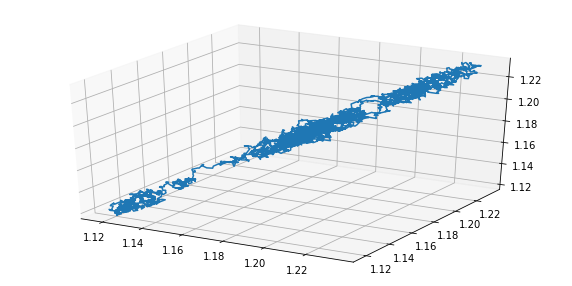

In [18]:
#COMPUTE FRACTAL DIMENSION AND PLOT TIME SERIES IN 3 DEMENSION

Dim_Corr(df,tao_close,m_takens_close,graph=True)

In [19]:
#CREATE DATA FROM TAKENS THEORY (USING LAGMENT FROM MUTUAL INFORMATION AND DIMENSION FROM FNN)

#STUCTURE OF DATA FOR EACH ROW
#[X(T-(M_TAKENS-1)*LAGMENT , X(T-(M_TAKENS-2)*LAGMENT ,  .... , X(T-*LAGMENT , X(T))]



data_tao_close_0 = []
data_tao_close_1 = []
data_tao_close_2 = []
data_tao_close_3 = []
data_tao_close_4 = []


for i in range(0,len(data_close)-(m_takens_close-1)*tao_close):
    data_tao_close_0.append(data_close[i])
    data_tao_close_1.append(data_close[i-tao_close])
    data_tao_close_2.append(data_close[i-2*tao_close])
    data_tao_close_3.append(data_close[i-3*tao_close])
    data_tao_close_4.append(data_close[i-4*tao_close])



data_tao_close_0 = np.array(data_tao_close_0)
data_tao_close_0 = np.reshape(data_tao_close_0,(data_tao_close_0.shape[0],1))
data_tao_close_1 = np.array(data_tao_close_1)
data_tao_close_1 = np.reshape(data_tao_close_1,(data_tao_close_1.shape[0],1))
data_tao_close_2 = np.array(data_tao_close_2)
data_tao_close_2 = np.reshape(data_tao_close_2,(data_tao_close_2.shape[0],1))
data_tao_close_3 = np.array(data_tao_close_3)
data_tao_close_3 = np.reshape(data_tao_close_3,(data_tao_close_3.shape[0],1))
data_tao_close_4 = np.array(data_tao_close_4)
data_tao_close_4 = np.reshape(data_tao_close_4,(data_tao_close_4.shape[0],1))


data_tao_close = np.concatenate((data_tao_close_4,data_tao_close_3,data_tao_close_2,data_tao_close_1,data_tao_close_0),axis = 1)
data_tao_close=np.array(data_tao_close)
data_tao_close.shape

(4973, 5)

In [20]:
#CREATE TRAIN DATA

x_train_close = data_tao_close[0:int(0.8*data_tao_close.shape[0])-1,0:data_tao_close.shape[1]]
y_train_close = data_tao_close[1:int(0.8*data_tao_close.shape[0]),-1]
x_train_close = np.array(x_train_close)
x_train_close = np.reshape(x_train_close,(x_train_close.shape[0],x_train_close.shape[1],1))
y_train_close = np.array(y_train_close)
y_train_close = np.reshape(y_train_close,(y_train_close.shape[0],1))
print(x_train_close.shape)
print(y_train_close.shape)

(3977, 5, 1)
(3977, 1)


In [26]:
#CREAT A RECURRENT NEURAL NETWORK

model = Sequential()

model.add(LSTM(5))
model.add(Dense(1))

In [29]:
model.compile(optimizer= 'Adam' , loss='MAE' )

In [30]:
model.fit(x_train_close,y_train_close, epochs = 10  , validation_data=(x_train_close, y_train_close), batch_size=10)

Train on 3977 samples, validate on 3977 samples
Epoch 1/10
3977/3977 [==============================] - 3s 675us/step - loss: 0.0027 - val_loss: 0.0022
Epoch 2/10
3977/3977 [==============================] - 2s 539us/step - loss: 0.0026 - val_loss: 0.0023
Epoch 3/10
3977/3977 [==============================] - 2s 564us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 4/10
3977/3977 [==============================] - 2s 557us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 5/10
3977/3977 [==============================] - 2s 558us/step - loss: 0.0026 - val_loss: 0.0028
Epoch 6/10
3977/3977 [==============================] - 2s 581us/step - loss: 0.0026 - val_loss: 0.0024
Epoch 7/10
3977/3977 [==============================] - 2s 628us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 8/10
3977/3977 [==============================] - 2s 571us/step - loss: 0.0025 - val_loss: 0.0021
Epoch 9/10
3977/3977 [==============================] - 2s 567us/step - loss: 0.0024 - val_loss: 0.0027
Epoch 10/10
3977

In [31]:
#CREATE TEST DATA FOR EVALURE MODEL

x_test_close = data_tao_close[x_train_close.shape[0]-1:-1,:]
x_test_close = np.reshape(x_test_close,(x_test_close.shape[0],x_test_close.shape[1],1))
y_test_close = data_tao_close[y_train_close.shape[0]:,:]
y_test_close = np.reshape(y_test_close,(y_test_close.shape[0],y_test_close.shape[1]))
print(x_test_close.shape)
print(y_test_close.shape)

(996, 5, 1)
(996, 5)


In [32]:
#PREDICTING BY THE MODEL

prediction_close = model.predict(x_test_close)
prediction_close = np.array(prediction_close)
prediction_close.shape

(996, 1)

In [33]:
RMSE = np.sqrt(np.mean((prediction_close - y_test_close)**2))
RMSE

0.003542543972098974

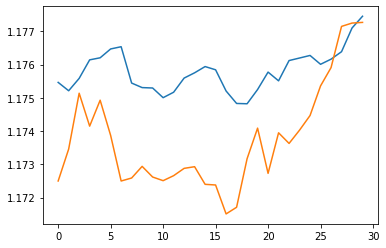

In [34]:
#PLOTING RESULTS

plt.plot(prediction_close[-30:,-1])
plt.plot(y_test_close[-30:,-1])

In [35]:
Prediction = []
prediction_close = list(prediction_close)
itter = 10
j=0
while j < itter+1:
    for i in range (1,len(prediction_close)):
        Prediction.append(prediction_close[i]+prediction_close[i-1])
    prediction_close = Prediction
    Prediction = []
    j=j+1
    
prediction_close = np.array(prediction_close)
prediction_close.shape

(985, 1)

In [36]:
Y_test = []
y_test_close = list(y_test_close[:,-1])
j=0
while j < itter+1:
    for i in range (1,len(y_test_close)):
        Y_test.append(y_test_close[i]+y_test_close[i-1])
    y_test_close = Y_test
    Y_test = []
    j=j+1
    
y_test_close = np.array(y_test_close)
y_test_close.shape

(985,)

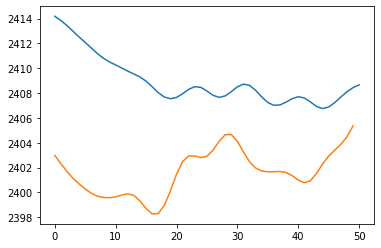

In [37]:
plt.plot(prediction_close[-51:,]-0.01)
plt.plot(y_test_close[-50:,])
#plt.plot(stationary_data[-50:])